<a href="https://colab.research.google.com/github/bireshwar1980/SML/blob/main/Classifiers_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
from keras import applications
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from tensorflow.keras.applications.nasnet import NASNetLarge
#from keras.applications.ResNet100

from tensorflow.keras.applications.nasnet import preprocess_input
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.layers import Flatten
from keras.preprocessing import image
from keras.utils import img_to_array
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import TensorBoard
from time import time
from imutils import paths

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model = applications.NASNetLarge(weights = "/content/drive/MyDrive/NASNet-large-no-top.h5", include_top=False, input_shape = (299, 299, 3))

In [ ]:
model.summary()

Model: "NASNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 stem_conv1 (Conv2D)         (None, 149, 149, 96)         2592      ['input_13[0][0]']            
                                                                                                  
 stem_bn1 (BatchNormalizati  (None, 149, 149, 96)         384       ['stem_conv1[0][0]']          
 on)                                                                                              
                                                                                                  
 activation_896 (Activation  (None, 149, 149, 96)         0         ['stem_bn1[0][0]']       

In [ ]:
l = model.output
l = Flatten()(l)
l = Dense(1024, activation="sigmoid")(l)

ResourceExhaustedError: {{function_node __wrapped__AddV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:AddV2] name: 

In [ ]:
final_model = Model(model.input,l)

In [ ]:
!unzip /content/drive/MyDrive/299classification.zip

Archive:  /content/drive/MyDrive/299classification.zip
   creating: 299classification/Autism/
  inflating: 299classification/Autism/0001.jpg  
  inflating: 299classification/Autism/0002.jpg  
  inflating: 299classification/Autism/0003.jpg  
  inflating: 299classification/Autism/0004.jpg  
  inflating: 299classification/Autism/0005.jpg  
  inflating: 299classification/Autism/0006.jpg  
  inflating: 299classification/Autism/0007.jpg  
  inflating: 299classification/Autism/0008.jpg  
  inflating: 299classification/Autism/0009.jpg  
  inflating: 299classification/Autism/0010.jpg  
  inflating: 299classification/Autism/0011.jpg  
  inflating: 299classification/Autism/0012.jpg  
  inflating: 299classification/Autism/0013.jpg  
  inflating: 299classification/Autism/0014.jpg  
  inflating: 299classification/Autism/0015.jpg  
  inflating: 299classification/Autism/0016.jpg  
  inflating: 299classification/Autism/0017.jpg  
  inflating: 299classification/Autism/0018.jpg  
  inflating: 299classifi

In [ ]:
import random
features = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/299classification.zip"  )  ) )


random.seed(42)
random.shuffle(imagePaths)
# loop over the input images
# i=0
for imagePath in imagePaths:
    # i+=1
    img = image.load_img(imagePath, target_size=(299,299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    feature = final_model.predict(x)
    features.append(feature[0])
    label = imagePath.split(os.path.sep)[-2]
    if label =='Autism':
        labels.append(0)
    else:
        labels.append(1)
    # if i==100:
    #   break

In [ ]:
import pickle
with open("/content/drive/MyDrive/Feature and label/features_vectors.txt", "rb") as fv:
    features = pickle.load(fv)
with open("/content/drive/MyDrive/Feature and label/labels.txt", "rb") as lp:
    labels = pickle.load(lp)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state =101)

In [ ]:
def plot_confusion_matrix(y_true, y_pred, matrix_title):
    """confusion matrix computation and display"""
    plt.figure(figsize=(9, 9), dpi=100)

    # use sklearn confusion matrix
    cm_array = confusion_matrix(y_true, y_pred)
    print('\n')
    print(cm_array)
    print('\n')
    print(classification_report(y_true, y_pred))
    plt.imshow(cm_array[:-1, :-1], interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(matrix_title, fontsize=16)

    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    cbar.set_label('Number of images', rotation=270, labelpad=30, fontsize=12)

    true_labels = np.unique(y_true)
    pred_labels = np.unique(y_pred)
    xtick_marks = np.arange(len(true_labels))
    ytick_marks = np.arange(len(pred_labels))

    plt.xticks(xtick_marks, true_labels, rotation=90)
    plt.yticks(ytick_marks, pred_labels)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.tight_layout()

    plt.show()

In [ ]:
def run_classifier(clfr, x_train_data, y_train_data, x_test_data, y_test_data, acc_str, matrix_header_str):
    """run chosen classifier and display results"""
    start_time = time()
    clfr.fit(x_train_data, y_train_data)
    y_pred = clfr.predict(x_test_data)
    print("%f seconds" % (time() - start_time))

    # confusion matrix computation and display
    print(acc_str.format(accuracy_score(y_test_data, y_pred) * 100))
    plot_confusion_matrix(y_test_data, y_pred, matrix_header_str)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


9.387570 seconds
CNN-SVM Accuracy: 74.4%


[[657 410]
 [126 900]]


              precision    recall  f1-score   support

           0       0.84      0.62      0.71      1067
           1       0.69      0.88      0.77      1026

    accuracy                           0.74      2093
   macro avg       0.76      0.75      0.74      2093
weighted avg       0.76      0.74      0.74      2093



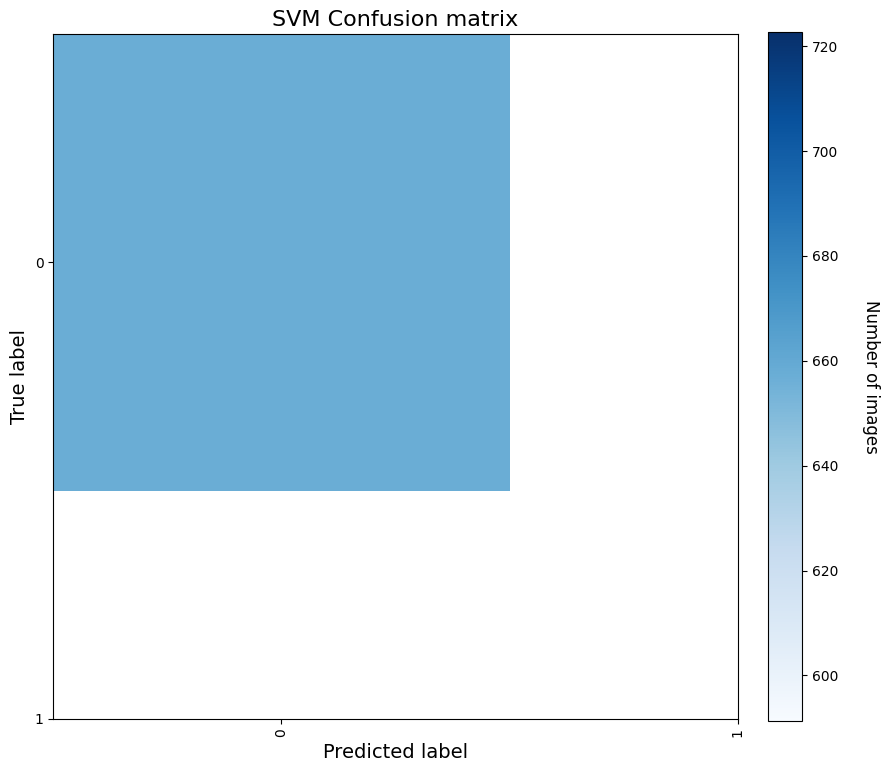

In [ ]:
clf = LinearSVC()
run_classifier(clf, X_train, y_train, X_test, y_test, "CNN-SVM Accuracy: {0:0.1f}%", "SVM Confusion matrix")

Extra Trees Classifier starting ...
1.589796 seconds
CNN-ET Accuracy: 86.0%


[[930 137]
 [155 871]]


              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1067
           1       0.86      0.85      0.86      1026

    accuracy                           0.86      2093
   macro avg       0.86      0.86      0.86      2093
weighted avg       0.86      0.86      0.86      2093



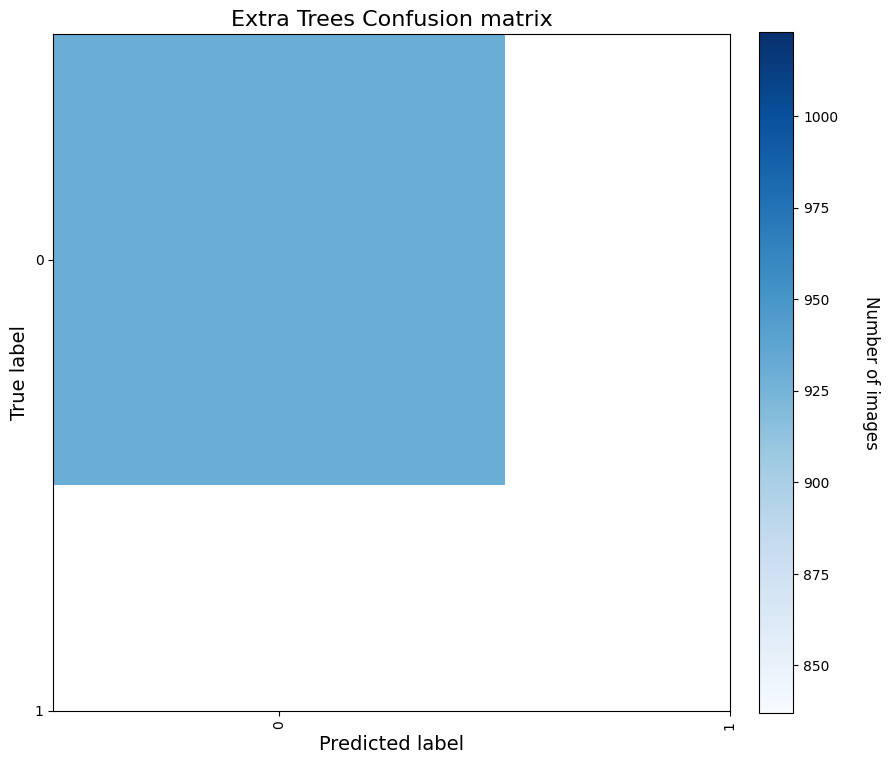

In [ ]:
print('Extra Trees Classifier starting ...')
clf = ExtraTreesClassifier(n_jobs=4,  n_estimators=100, criterion='gini', min_samples_split=10,
                           max_features=50, max_depth=40, min_samples_leaf=4)
run_classifier(clf, X_train, y_train, X_test, y_test, "CNN-ET Accuracy: {0:0.1f}%", "Extra Trees Confusion matrix")

Decision Tree Classifier starting ...
2.209247 seconds
CNN-DTC Accuracy: 76.6%


[[824 243]
 [246 780]]


              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1067
           1       0.76      0.76      0.76      1026

    accuracy                           0.77      2093
   macro avg       0.77      0.77      0.77      2093
weighted avg       0.77      0.77      0.77      2093



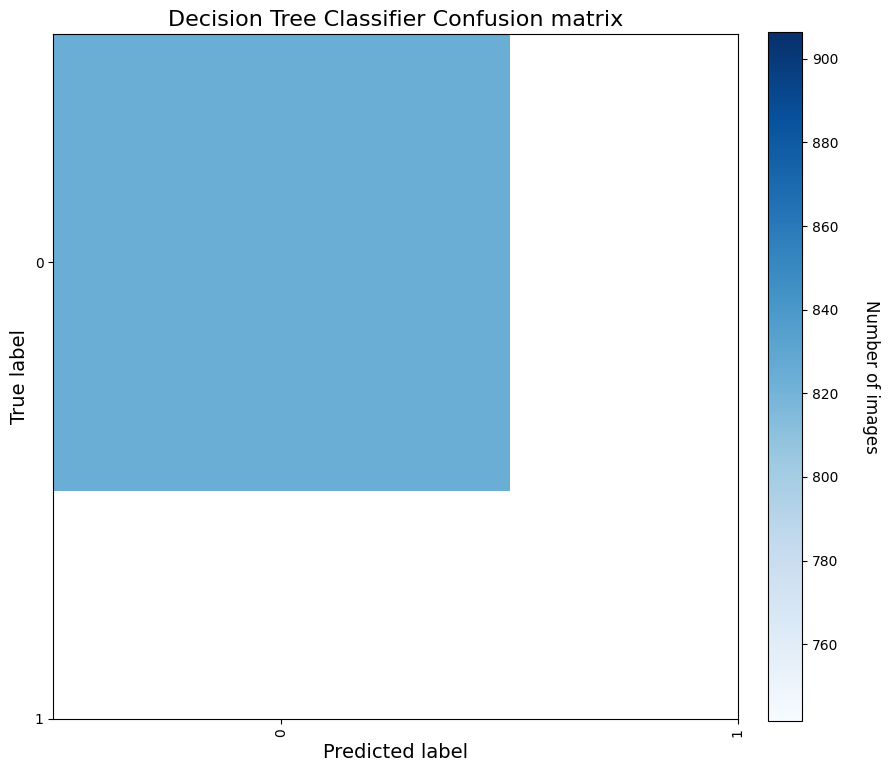

In [ ]:
print('Decision Tree Classifier starting ...')
clf = DecisionTreeClassifier()
run_classifier(clf, X_train,y_train, X_test, y_test, "CNN-DTC Accuracy: {0:0.1f}%",
               "Decision Tree Classifier Confusion matrix")

Random Forest Classifier starting ...
2.329744 seconds
CNN-RF Accuracy: 87.9%


[[938 129]
 [124 902]]


              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1067
           1       0.87      0.88      0.88      1026

    accuracy                           0.88      2093
   macro avg       0.88      0.88      0.88      2093
weighted avg       0.88      0.88      0.88      2093



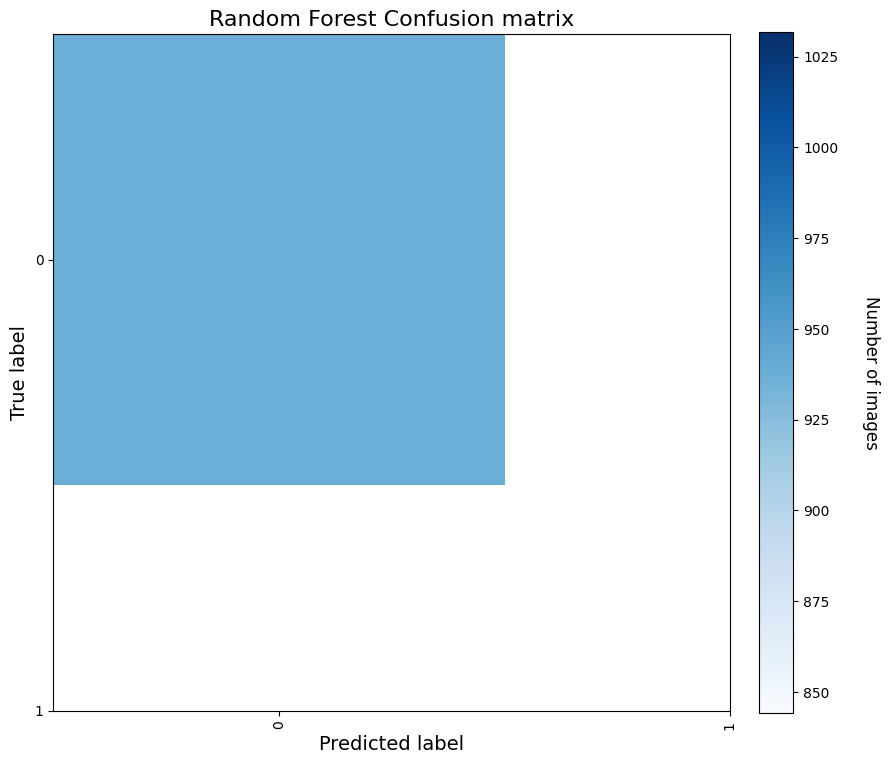

In [ ]:
print('Random Forest Classifier starting ...')
clf = RandomForestClassifier(n_jobs=4, criterion='entropy', n_estimators=70, min_samples_split=5)
run_classifier(clf, X_train, y_train, X_test, y_test, "CNN-RF Accuracy: {0:0.1f}%", "Random Forest Confusion matrix")

K-Nearest Neighbours Classifier starting ...
0.580173 seconds
CNN-KNN Accuracy: 90.1%


[[969  98]
 [110 916]]


              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1067
           1       0.90      0.89      0.90      1026

    accuracy                           0.90      2093
   macro avg       0.90      0.90      0.90      2093
weighted avg       0.90      0.90      0.90      2093



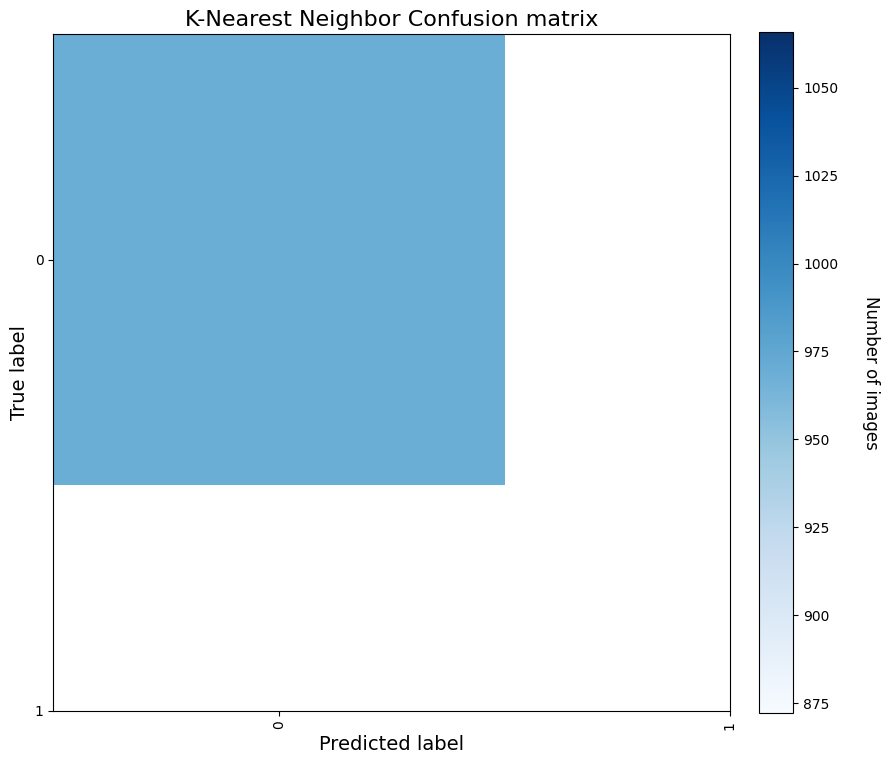

In [ ]:
print('K-Nearest Neighbours Classifier starting ...')
clf = KNeighborsClassifier(n_neighbors=1, n_jobs=4)
run_classifier(clf, X_train, y_train, X_test, y_test, "CNN-KNN Accuracy: {0:0.1f}%", "K-Nearest Neighbor Confusion matrix")

Multi-layer Perceptron Classifier starting ...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


27.663324 seconds
CNN-MLP Accuracy: 84.1%


[[921 146]
 [187 839]]


              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1067
           1       0.85      0.82      0.83      1026

    accuracy                           0.84      2093
   macro avg       0.84      0.84      0.84      2093
weighted avg       0.84      0.84      0.84      2093



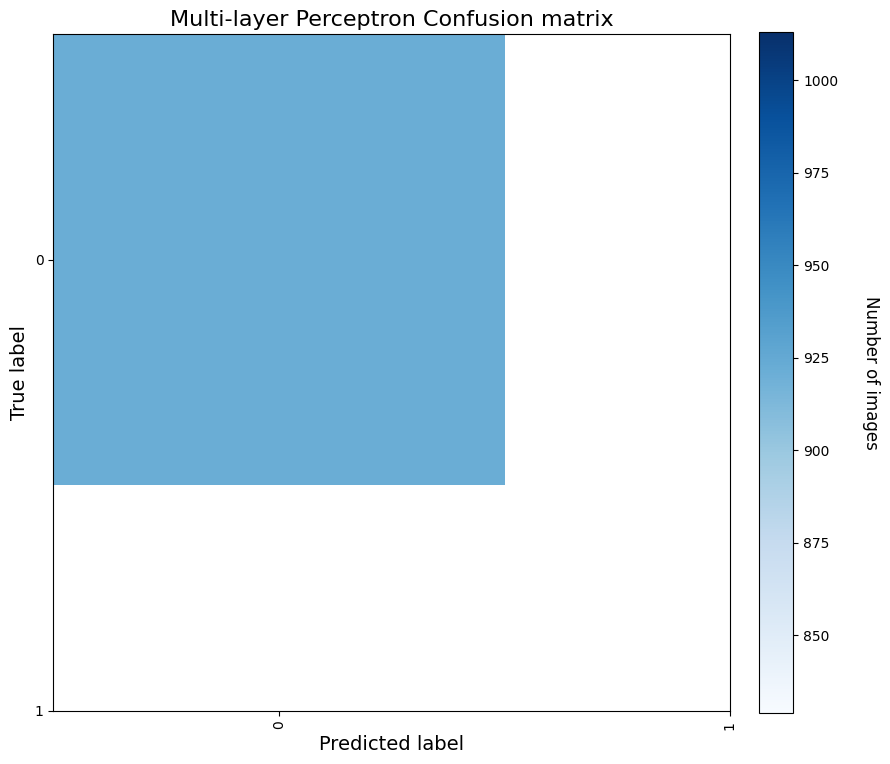

In [ ]:
print('Multi-layer Perceptron Classifier starting ...')
clf = MLPClassifier()
run_classifier(clf, X_train, y_train, X_test, y_test, "CNN-MLP Accuracy: {0:0.1f}%", "Multi-layer Perceptron Confusion matrix")

Gaussian Naive Bayes Classifier starting ...
0.069120 seconds
CNN-GNB Accuracy: 54.5%


[[ 138  929]
 [  23 1003]]


              precision    recall  f1-score   support

           0       0.86      0.13      0.22      1067
           1       0.52      0.98      0.68      1026

    accuracy                           0.55      2093
   macro avg       0.69      0.55      0.45      2093
weighted avg       0.69      0.55      0.45      2093



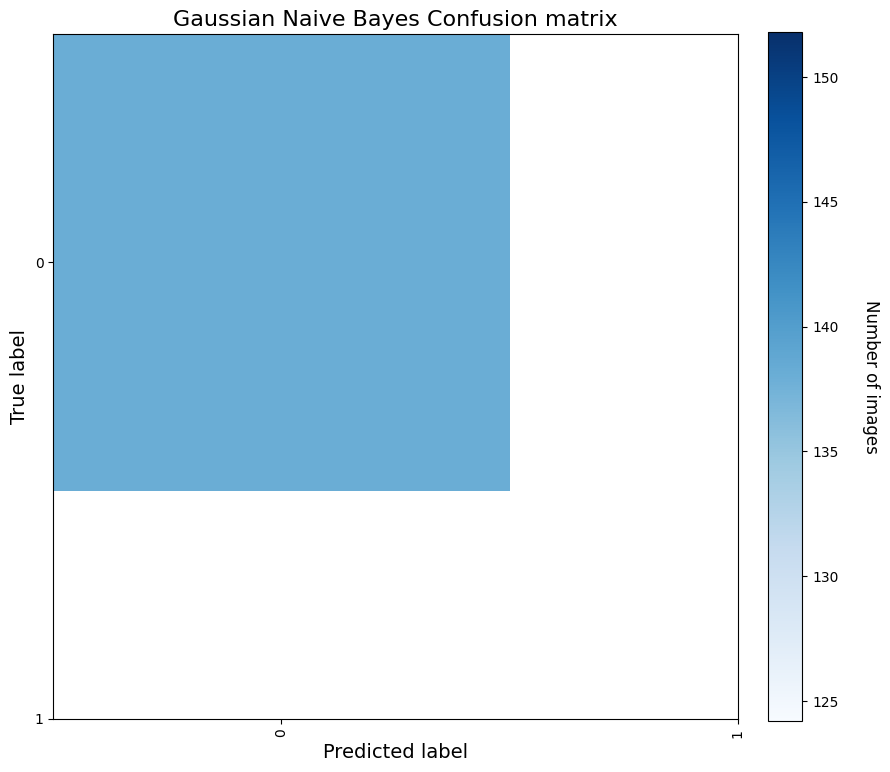

In [ ]:
print('Gaussian Naive Bayes Classifier starting ...')
clf = GaussianNB()
run_classifier(clf, X_train, y_train, X_test, y_test, "CNN-GNB Accuracy: {0:0.1f}%", "Gaussian Naive Bayes Confusion matrix")

Linear Discriminant Analysis Classifier starting ...
1.968162 seconds
CNN-LDA Accuracy: 75.8%


[[812 255]
 [251 775]]


              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1067
           1       0.75      0.76      0.75      1026

    accuracy                           0.76      2093
   macro avg       0.76      0.76      0.76      2093
weighted avg       0.76      0.76      0.76      2093



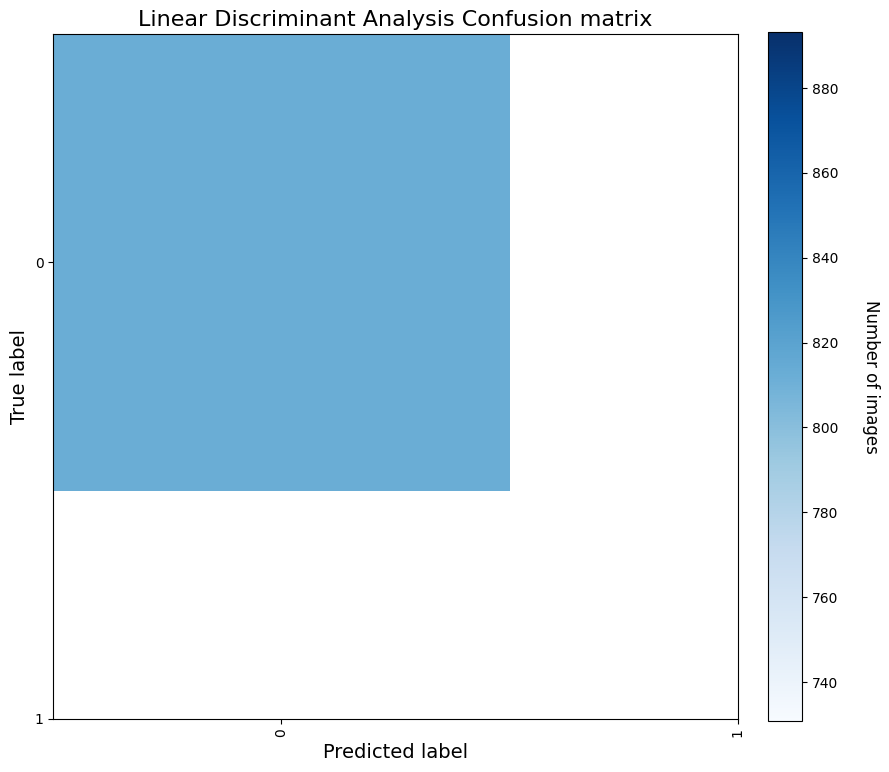

In [ ]:
print('Linear Discriminant Analysis Classifier starting ...')
clf = LinearDiscriminantAnalysis()
run_classifier(clf, X_train, y_train, X_test, y_test, "CNN-LDA Accuracy: {0:0.1f}%", "Linear Discriminant Analysis Confusion matrix")

Quadratic Discriminant Analysis Classifier starting ...


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


2.760359 seconds
CNN-QDA Accuracy: 55.5%


[[ 155  912]
 [  20 1006]]


              precision    recall  f1-score   support

           0       0.89      0.15      0.25      1067
           1       0.52      0.98      0.68      1026

    accuracy                           0.55      2093
   macro avg       0.71      0.56      0.47      2093
weighted avg       0.71      0.55      0.46      2093



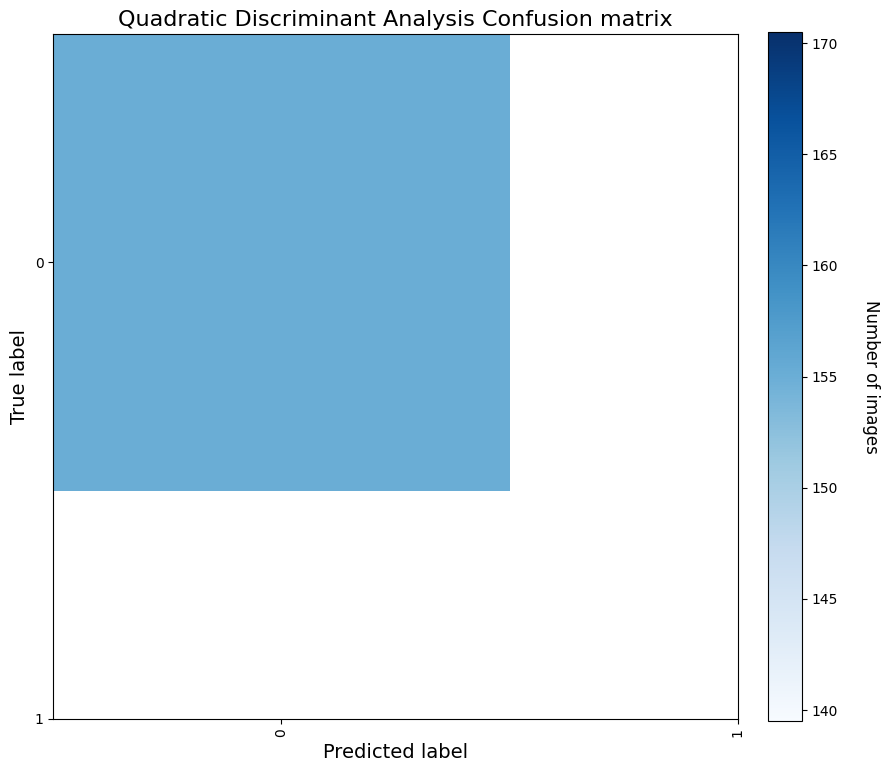

In [ ]:
print('Quadratic Discriminant Analysis Classifier starting ...')
clf = QuadraticDiscriminantAnalysis()
run_classifier(clf, X_train, y_train, X_test, y_test, "CNN-QDA Accuracy: {0:0.1f}%", "Quadratic Discriminant Analysis Confusion matrix")

In [ ]:
len(features)

23500